In [1]:
import torch

# see if we have a gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [2]:
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# load the MNIST dataset
transform = transforms.ToTensor()
mnist_train_data = torchvision.datasets.mnist.MNIST(root="./data", train=True, transform=transform, download=True)
mnist_train_loader = DataLoader(mnist_train_data, batch_size=30, shuffle=True, num_workers=2)
mnist_test_data = torchvision.datasets.mnist.MNIST(root="./data", train=False, transform=transform, download=True)
mnist_test_loader = DataLoader(mnist_test_data, batch_size=30, shuffle=False, num_workers=2)
classes = tuple([str(i) for i in range(10)])


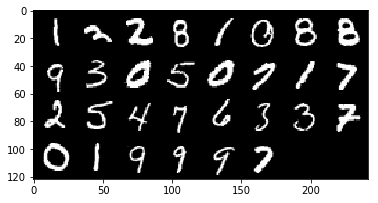

    1     2     2     8     1     0     8     8     9     3     0     5     0     7     1     7     2     5     4     7     6     3     3     7     0     1     9     9     9     7


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# function to show an image
def show_image(img):
	np_image = img.numpy()
	plt.imshow(np.transpose(np_image, (1, 2, 0)))
	plt.show()

# get some random training images
data_iter = iter(mnist_train_loader)
images, labels = data_iter.next()

# show images
show_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))


In [4]:
import torch.nn as nn
import torch.nn.functional as f
import copy

# make a network
class SimpleMnistNet(nn.Module):
	def __init__(self):
		super(SimpleMnistNet, self).__init__()
		self.fc1 = nn.Linear(28 * 28, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)
		self.first = True

	def forward(self, x):
		if self.first:
			self.first = False
			y = copy.deepcopy(x)
			print(y.shape)
		x = x.view(-1, 28 * 28)
		x = f.relu(self.fc1(x))
		x = f.relu(self.fc2(x))
		x = self.fc3(x)
		return x

net = SimpleMnistNet()


In [5]:
# loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [7]:
# train the network

PRINT_FREQUENCY = 100

net.to(device)
for epoch in range(2):  # loop over the dataset multiple times

	running_loss = 0.0
	for i, data in enumerate(mnist_train_loader, 0):
		# get the inputs; data is a list of [inputs, labels]
		inputs, labels = data[0].to(device), data[1].to(device)

		# zero the parameter gradients
		optimizer.zero_grad()

		# forward + backward + optimize
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()

		# print statistics
		running_loss += loss.item()
		if i % PRINT_FREQUENCY == (PRINT_FREQUENCY - 1):	# print the occasional mini-batch
			print('[%d, %5d] loss: %.3f' %
				  (epoch + 1, i + 1, running_loss / 2000))
			running_loss = 0.0

print('Finished Training')


[1,   100] loss: 0.016
[1,   200] loss: 0.017
[1,   300] loss: 0.017
[1,   400] loss: 0.016
[1,   500] loss: 0.018
[1,   600] loss: 0.015
[1,   700] loss: 0.016
[1,   800] loss: 0.016
[1,   900] loss: 0.016
[1,  1000] loss: 0.016
[1,  1100] loss: 0.016
[1,  1200] loss: 0.016
[1,  1300] loss: 0.015
[1,  1400] loss: 0.014
[1,  1500] loss: 0.016
[1,  1600] loss: 0.015
[1,  1700] loss: 0.016
[1,  1800] loss: 0.014
[1,  1900] loss: 0.013
[1,  2000] loss: 0.014
[2,   100] loss: 0.014
[2,   200] loss: 0.014
[2,   300] loss: 0.013
[2,   400] loss: 0.014
[2,   500] loss: 0.014
[2,   600] loss: 0.013
[2,   700] loss: 0.013
[2,   800] loss: 0.013
[2,   900] loss: 0.013
[2,  1000] loss: 0.014
[2,  1100] loss: 0.014
[2,  1200] loss: 0.014
[2,  1300] loss: 0.015
[2,  1400] loss: 0.014
[2,  1500] loss: 0.014
[2,  1600] loss: 0.013
[2,  1700] loss: 0.014
[2,  1800] loss: 0.013
[2,  1900] loss: 0.013
[2,  2000] loss: 0.013
Finished Training


In [8]:
# save net state

PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)


In [ ]:
# re-load the saved state

net = SimpleMnistNet()
net.load_state_dict(torch.load(PATH))
net.to(device)


In [9]:
# test the overall accuracy

correct = 0
total = 0
with torch.no_grad():
	for data in mnist_test_loader:
		images, labels = data[0].to(device), data[1].to(device)
		outputs = net(images)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
	100 * correct / total))


Accuracy of the network on the 10000 test images: 92 %


In [12]:
import cv2

# load a home-made image
test_image_path = "./HomeTests/03-8.png"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image_tensor = torch.tensor(test_image, dtype=torch.float).to(device)
test_output = net(test_image_tensor)
print(test_output)
print(classes[torch.argmax(test_output, dim=1).item()])



tensor([[ 1063.6884, -2402.7039,  2370.9529,  2534.7224, -3156.7627,  1499.8308,
         -2769.9602,  -775.0450,  2644.1987,  -342.4733]], device='cuda:0',
       grad_fn=<AddmmBackward>)
8
